In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

bank = pd.read_csv('/content/bank.csv',sep=';')
bank

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


Q1. Perform EDA on the given data. What does the primary analysis of several categorical features reveal?

In [ ]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
bank.shape

(41188, 21)

In [ ]:
bank.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [ ]:
bank_corr = bank.corr()
bank_corr

<ipython-input-29-1256a80ac360>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  bank_corr = bank.corr()


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


<Axes: >

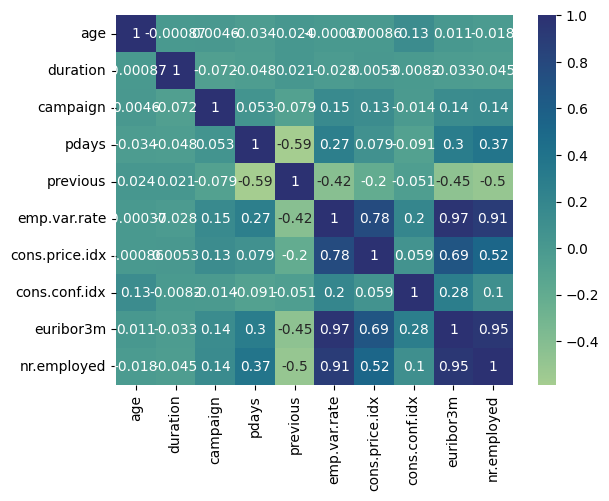

In [ ]:
sns.heatmap(bank_corr,annot=True,cmap='crest')

In [ ]:
categorical_columns = bank.select_dtypes(include='object')
categorical_columns

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...
41183,retired,married,professional.course,no,yes,no,cellular,nov,fri,nonexistent,yes
41184,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,no
41185,retired,married,university.degree,no,yes,no,cellular,nov,fri,nonexistent,no
41186,technician,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,yes


Q.2. Perform the following pre-processing tasks:

a. Missing Value Analysis

b. Label Encoding wherever required

c. Selecting important features based on Random Forest

d. Handling unbalanced data using SMOTE

e. Standardize the data using any one of the scalers provided by sklearn

In [ ]:
# for question a

bank.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

The above missing value analysis revealed that there are no such missing values in a dataset

In [ ]:
# for question b

from sklearn.preprocessing import LabelEncoder

lab_enc = LabelEncoder()

cat_cols = bank.select_dtypes(include='object').columns

for col in cat_cols:
  bank[col] = lab_enc.fit_transform(bank[col])

Accuracy: 0.9133284777858703
Top 5 most importance features:
1. duration (0.3152)
2. euribor3m (0.1094)
3. age (0.0920)
4. nr.employed (0.0625)
5. job (0.0480)


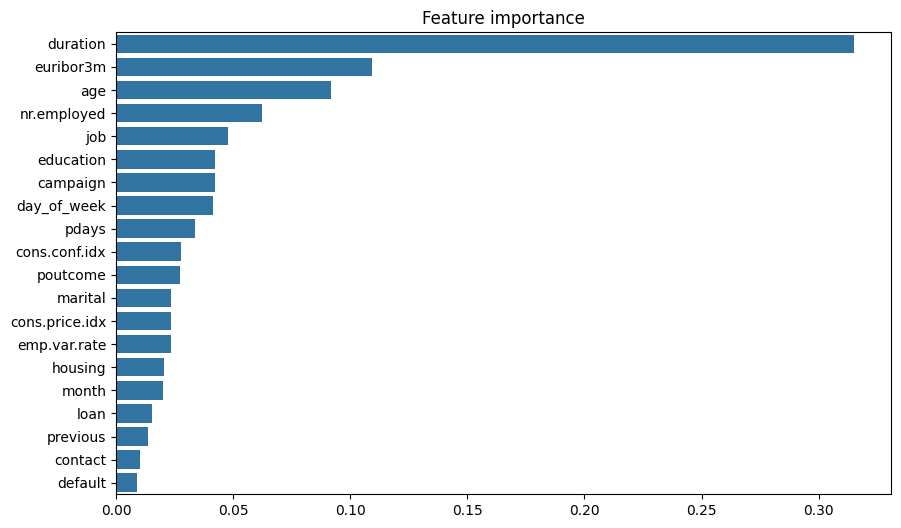

In [ ]:
# for question c
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

# applying random forest for selecting feature importance based on it

x = bank.drop('y', axis=1)
y = bank['y']

X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2,random_state=42)

rfc = RandomForestClassifier(n_estimators=300,random_state=42)
rfc.fit(X_train,Y_train)

y_pred = rfc.predict(X_test)
accuracy = accuracy_score(Y_test,y_pred)
print("Accuracy:", accuracy)

rfc_importance = rfc.feature_importances_

features = sorted(zip(bank.columns,rfc_importance), key=lambda x: x[1],reverse=True)


print("Top 5 most importance features:")

for i in range(5):
  print(f"{i+1}. {features[i][0]} ({features[i][1]:.4f})")

plt.figure(figsize=(10,6))
sns.barplot(x = [x[1] for x in features], y =[x[0] for x in features])
plt.title("Feature importance")
plt.show()








No. of samples of every class after resampling of y:0    29245
1    29245
Name: y, dtype: int64


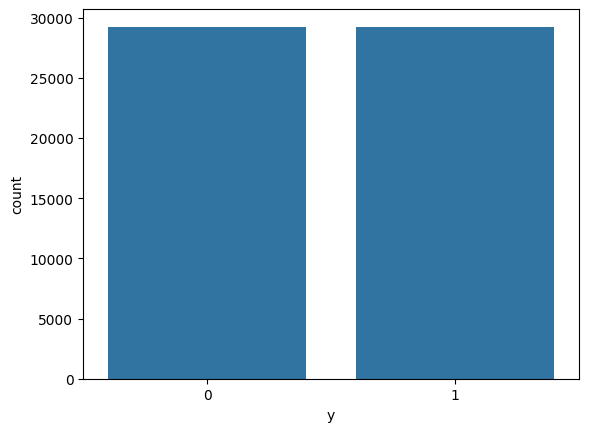

<Figure size 1500x1000 with 0 Axes>

In [ ]:
# for question d

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)

X_train_resampled,Y_train_resampled = smote.fit_resample(X_train,Y_train)

print(f"No. of samples of every class after resampling of y:{Y_train_resampled.value_counts()}")

sns.countplot(x=Y_train_resampled)
plt.figure(figsize=(15,10))
plt.show()






In [ ]:
# for question e
from sklearn.preprocessing import StandardScaler

X_standardized = StandardScaler()
X_standardized.fit_transform(x)

array([[ 1.53303429, -0.20157925, -0.2837415 , ...,  0.88644656,
         0.71245988,  0.33167991],
       [ 1.62899323,  0.91122681, -0.2837415 , ...,  0.88644656,
         0.71245988,  0.33167991],
       [-0.29018564,  0.91122681, -0.2837415 , ...,  0.88644656,
         0.71245988,  0.33167991],
       ...,
       [ 1.53303429,  0.35482378, -0.2837415 , ..., -2.22495344,
        -1.49518647, -2.8156966 ],
       [ 0.38152696,  1.46762984, -0.2837415 , ..., -2.22495344,
        -1.49518647, -2.8156966 ],
       [ 3.26029527,  0.35482378, -0.2837415 , ..., -2.22495344,
        -1.49518647, -2.8156966 ]])

3. Build the following Supervised Learning models:

	a. Logistic Regression

	b. Decision Trees
  
	c. Random Forest


In [ ]:
# for Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2,random_state=42)

logreg = LogisticRegression()
logreg.fit(X_train,Y_train)

y_pred_log = logreg.predict(X_test)
accuracy_log = accuracy_score(Y_test,y_pred_log)
classrep_log = classification_report(Y_test,y_pred_log)
conf_mtx_log = confusion_matrix(Y_test,y_pred_log)

print("Accuracy score:", accuracy_log)
print("Classification report:", classrep_log)
print("Confusion matrix:", conf_mtx_log)



Accuracy score: 0.9095654285020636
Classification report:               precision    recall  f1-score   support

           0       0.93      0.97      0.95      7303
           1       0.66      0.41      0.51       935

    accuracy                           0.91      8238
   macro avg       0.80      0.69      0.73      8238
weighted avg       0.90      0.91      0.90      8238

Confusion matrix: [[7106  197]
 [ 548  387]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# for Decision Tree
from sklearn.tree import DecisionTreeClassifier, plot_tree

dectree = DecisionTreeClassifier(criterion='entropy',random_state=42)
dectree.fit(X_train,Y_train)

y_pred = dectree.predict(X_test)

accuracy_dec = accuracy_score(Y_test,y_pred)
classrep_dec = classification_report(Y_test,y_pred)
conf_mtx_dec = confusion_matrix(Y_test,y_pred)

print("Accuracy score:", accuracy_dec)
print("Classification report:", classrep_dec)
print("Confusion matrix:", conf_mtx_dec)


Accuracy score: 0.8879582422918184
Classification report:               precision    recall  f1-score   support

           0       0.94      0.93      0.94      7303
           1       0.51      0.54      0.52       935

    accuracy                           0.89      8238
   macro avg       0.72      0.73      0.73      8238
weighted avg       0.89      0.89      0.89      8238

Confusion matrix: [[6814  489]
 [ 434  501]]


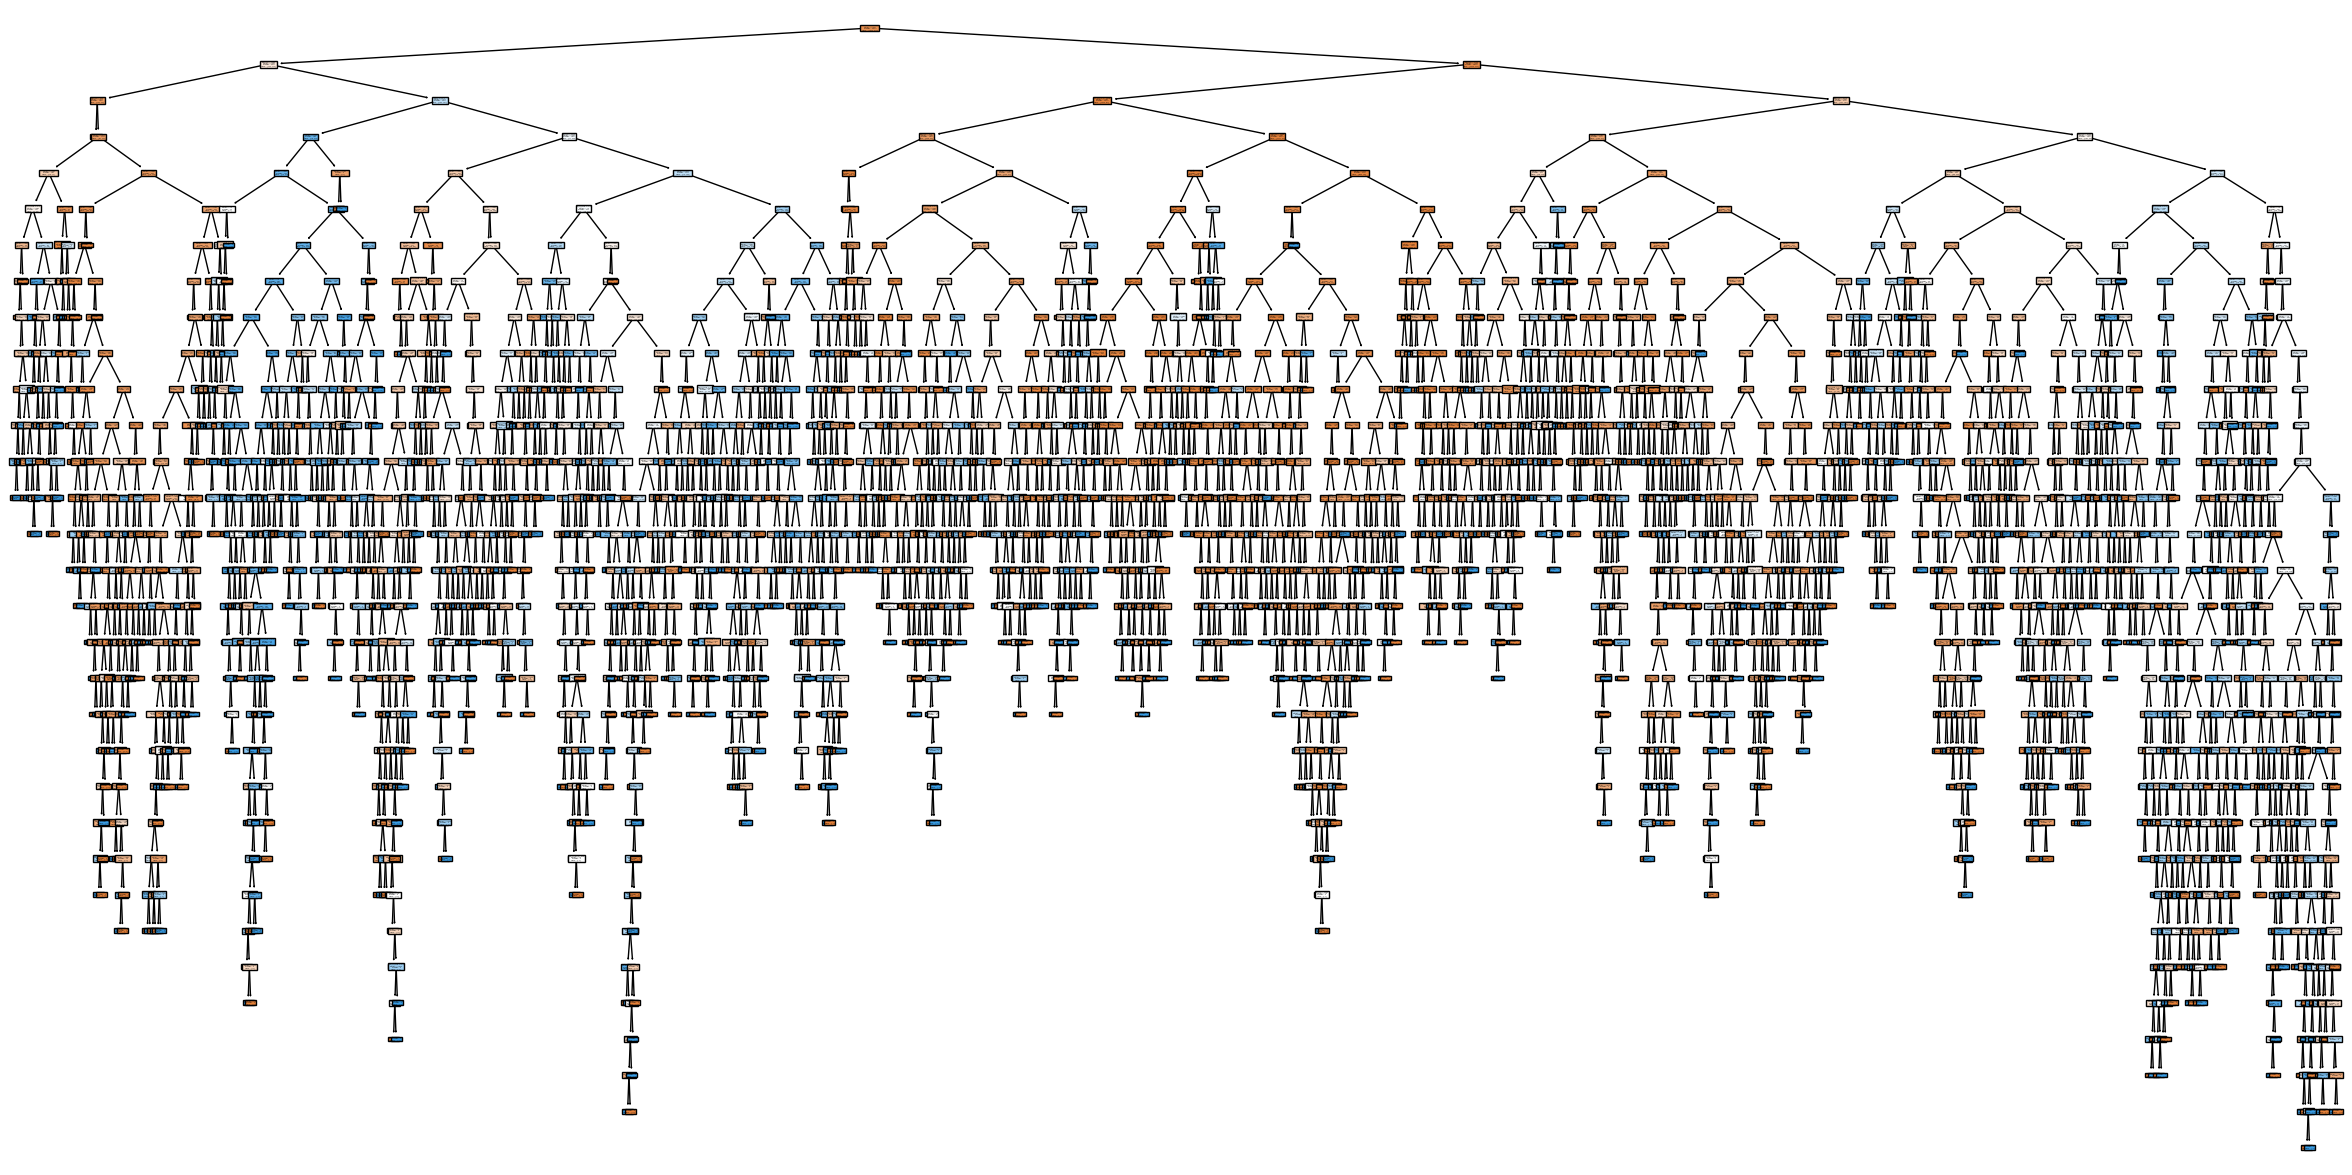

In [ ]:

plt.figure(figsize=(30,15))
plot_tree(dectree, filled=True, feature_names=x.columns)
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=300,random_state=42)
rfc.fit(X_train,Y_train)

y_pred = rfc.predict(X_test)

accuracy_rfc = accuracy_score(Y_test,y_pred)
classrep_rfc = classification_report(Y_test,y_pred)
conf_mtx_rfc = confusion_matrix(Y_test,y_pred)

print("Accuracy score:", accuracy_rfc)
print("Classification report:", classrep_rfc)
print("Confusion matrix:", conf_mtx_rfc)




Accuracy score: 0.9133284777858703
Classification report:               precision    recall  f1-score   support

           0       0.94      0.96      0.95      7303
           1       0.65      0.52      0.58       935

    accuracy                           0.91      8238
   macro avg       0.79      0.74      0.76      8238
weighted avg       0.91      0.91      0.91      8238

Confusion matrix: [[7038  265]
 [ 449  486]]


In [ ]:
# hyperparameter tuning for logistic regression
from sklearn.model_selection import GridSearchCV

param_grid = {
  'penalty': ['l1', 'l2'],
  'C': [0.001, 0.01]}

logreg = LogisticRegression()


grid_search = GridSearchCV(logreg, param_grid, cv=5)

X_train, X_test, Y_train_resampled, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)

grid_search.fit(X_train, Y_train_resampled)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

print("Best hyperparameters:")
print(grid_search.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Accuracy: 0.909686817188638
Best hyperparameters:
{'C': 0.01, 'penalty': 'l2'}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# hyperparameter tuning for decision tree


param_grid = {
  'max_depth': [None, 5, 10, 20, ],
  'min_samples_split': [2, 5, 10, 15],
  'min_samples_leaf': [1, 2, 4, 6]
}

dectree = DecisionTreeClassifier()

grid_search = GridSearchCV(dectree, param_grid, cv=5)


grid_search.fit(X_train, Y_train_resampled)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

print("Best hyperparameters:")
print(grid_search.best_params_)

Accuracy: 0.9149065307113377
Best hyperparameters:
{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5}


In [ ]:
# hyperparameter tuning for random forest

param_grid = {
  'n_estimators': [10, 5, 18, 20],
  'max_depth': [None, 5, 10, 20],
  'min_samples_split': [2, 5, 10, 15],
  'min_samples_leaf': [1, 2, 4, 6]
}

rfc = RandomForestClassifier()

grid_search = GridSearchCV(rfc, param_grid, cv=5)

grid_search.fit(X_train, Y_train_resampled)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

print("Best hyperparameters:")
print(grid_search.best_params_)



Accuracy: 0.9159990288905074
Best hyperparameters:
{'max_depth': None, 'min_samples_leaf': 6, 'min_samples_split': 15, 'n_estimators': 20}


Based on the accuracy score and the best hyperparameters, we can conclude that the tuned Random Forest model performs better in predicting if the client will subscribe to term deposit or not.

In [ ]:
from tabulate import tabulate
data=[["RANDOM FOREST",accuracy_rfc],
      ["DECISION TREE",accuracy_dec],
      ["LOGISTIC_REGRESSION",accuracy_log]]

col_names = ["Model", "Accuracy_Score"]
print(tabulate(data, headers=["MODEL","ACCURACY_SCORE"], tablefmt="fancy_grid"))

╒═════════════════════╤══════════════════╕
│ MODEL               │   ACCURACY_SCORE │
╞═════════════════════╪══════════════════╡
│ RANDOM FOREST       │         0.913328 │
├─────────────────────┼──────────────────┤
│ DECISION TREE       │         0.887958 │
├─────────────────────┼──────────────────┤
│ LOGISTIC_REGRESSION │         0.909565 │
╘═════════════════════╧══════════════════╛


Based on the accuracy score, we can conclude that the tuned Random Forest model performs better in predicting if the client will subscribe to term deposit or not.